In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib as matplotlib

import warnings
warnings.filterwarnings('ignore')
# 그래프를 그리기 위한 기본 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 14
# 폰트 설정 시 - 기호 깨지는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 전처리
### 1) 데이터 불러오기

In [2]:
df = pd.read_csv('data/rose_3type_2017_to_202106.csv')

In [3]:
df['경매일'] = pd.to_datetime(df['경매일'])

In [4]:
cat_columns = [c for c, t in zip(df.dtypes.index, df.dtypes) if t=='O'] 
num_columns = [c for c in df.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['화훼부류명', '품목명', '품종명', '등급명']

Numeric Columns: 
['경매일', '최고가', '최저가', '평균가', '총금액', '총물량']



In [5]:
df['연도'] = df['경매일'].dt.year
df['월'] = df['경매일'].dt.month
df['일'] = df['경매일'].dt.day

In [6]:
df_puego = df[df['품종명'] == '푸에고']
df_victoria = df[df['품종명'] == '빅토리아']
df_hera = df[df['품종명'] == '헤라']

### 2) 이상치, 결측치 확인 및 제거

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11237 entries, 0 to 11236
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   경매일     11237 non-null  datetime64[ns]
 1   화훼부류명   11237 non-null  object        
 2   품목명     11237 non-null  object        
 3   품종명     11237 non-null  object        
 4   등급명     11237 non-null  object        
 5   최고가     11237 non-null  int64         
 6   최저가     11237 non-null  int64         
 7   평균가     11237 non-null  int64         
 8   총금액     11237 non-null  int64         
 9   총물량     11237 non-null  int64         
 10  연도      11237 non-null  int64         
 11  월       11237 non-null  int64         
 12  일       11237 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.1+ MB


<AxesSubplot:>

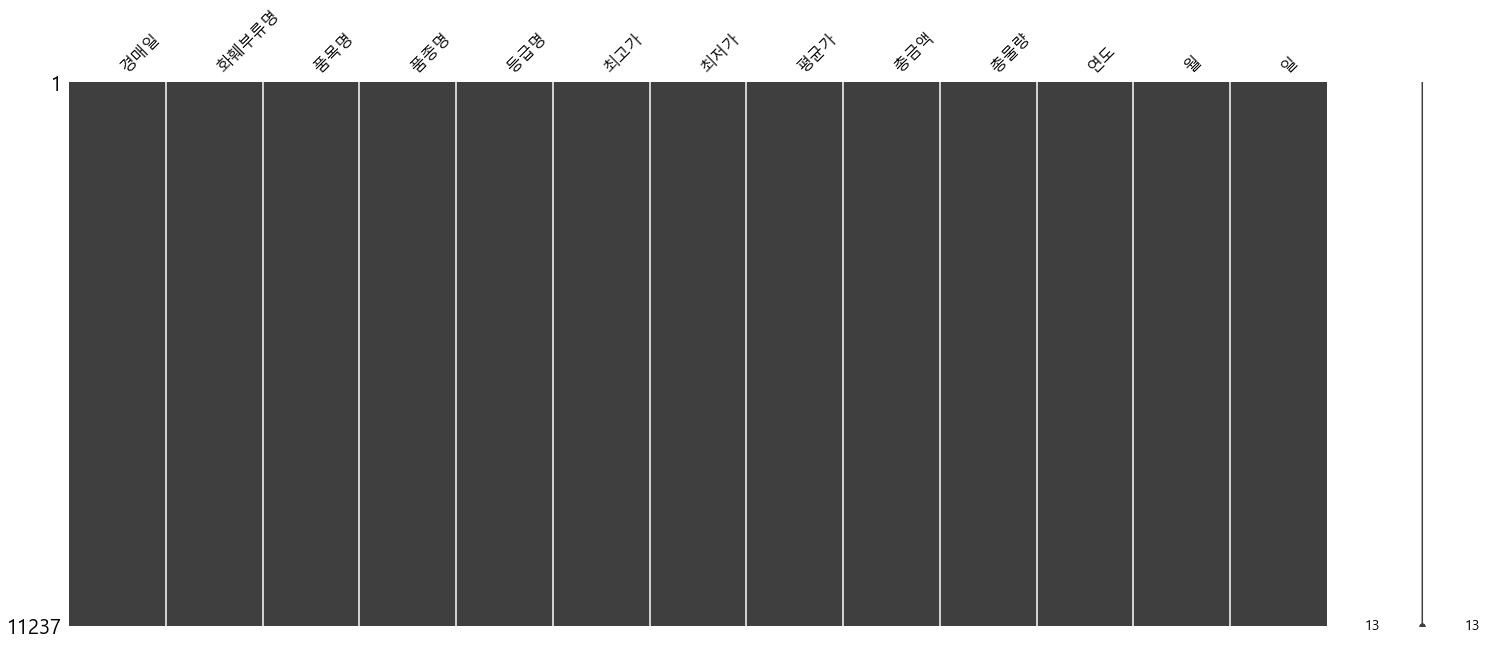

In [8]:
import missingno as msno
msno.matrix(df, sort='ascending')

In [9]:
df.isna().sum()

경매일      0
화훼부류명    0
품목명      0
품종명      0
등급명      0
최고가      0
최저가      0
평균가      0
총금액      0
총물량      0
연도       0
월        0
일        0
dtype: int64

In [10]:
# object만 보여준다
df.describe(include='O').T

,count,unique,top,freq
화훼부류명,11237,1,절화,11237
품목명,11237,1,장미,11237
품종명,11237,3,푸에고,4417
등급명,11237,9,특2,2175


In [11]:
# 이상치 확인
df.groupby('품종명')['최고가','최저가'].describe()

최고가                                                            \
       count         mean          std    min     25%     50%      75%   
품종명                                                                      
빅토리아  2734.0  8788.888076  4613.063135  570.0  5080.0  8350.0  12080.0   
푸에고   4417.0  6332.503962  3576.534386  570.0  3600.0  5780.0   8300.0   
헤라    4086.0  5873.565835  3348.485010  500.0  3250.0  5430.0   8050.0   

                  최저가                                                   \
          max   count         mean          std    min     25%     50%   
품종명                                                                      
빅토리아  24600.0  2734.0  5917.882224  3222.224055  570.0  3430.0  5500.0   
푸에고   24600.0  4417.0  4413.504641  2878.694741  420.0  2150.0  3710.0   
헤라    22950.0  4086.0  3750.141948  2487.959260  300.0  1780.0  3190.0   

                       
         75%      max  
품종명                    
빅토리아  7950.0  20100.0  
푸에고   6000.0  20850.0  
헤라    5100.0  17900.0

In [12]:
# 이상치 확인
df.groupby(['품종명'])['평균가'].describe().T

품종명,빅토리아,푸에고,헤라
count,2734.000000,4417.000000,4086.000000
mean,7120.223848,5403.315146,4692.375428
std,3641.322511,3199.380242,2787.745680
min,570.000000,527.000000,425.000000
25%,4266.500000,2943.000000,2550.000000
50%,6740.500000,4816.000000,4195.500000
75%,9485.500000,7150.000000,6381.000000
max,22050.000000,22566.000000,20235.000000


In [13]:
# 이상치 확인
df.groupby(['품종명','등급명'])['평균가'].describe().T

품종명           빅토리아                                                        \
등급명             보1           보2           보3            상1            상2   
count     7.000000     4.000000     8.000000    493.000000    286.000000   
mean   2914.714286  1220.000000  1805.500000   5654.563895   3876.094406   
std    2610.308201   216.487105   859.345764   2300.302906   2029.182169   
min    1250.000000   950.000000   720.000000   1230.000000    570.000000   
25%    1450.000000  1152.500000  1072.500000   3995.000000   2398.250000   
50%    2300.000000  1225.000000  1854.000000   5271.000000   3514.500000   
75%    2645.000000  1292.500000  2400.000000   7108.000000   5028.000000   
max    8663.000000  1480.000000  3206.000000  14019.000000  13600.000000   

품종명                                                                   푸에고  \
등급명             상3            특1            특2            특3           보1   
count   173.000000    650.000000    665.000000    448.000000    43.000000   
mean   2861.271676  11027.303077   8067.565414   5587.107143  3187.860465   
std    1646.199895   3059.491668   2508.167309   2330.572688  2294.016872   
min     660.000000   2590.000000   1856.000000   1000.000000   667.000000   
25%    1700.000000   8768.250000   6219.000000   3911.000000  1343.000000   
50%    2533.000000  10706.000000   7699.000000   5119.500000  2146.000000   
75%    3500.000000  12766.000000   9772.000000   7000.500000  4825.000000   
max    9339.000000  22050.000000  16408.000000  16100.000000  9750.000000   

품종명    ...                         헤라                                          \
등급명    ...            특3           보1           보2           보3            상1   
count  ...    776.000000    19.000000     7.000000    50.000000    718.000000   
mean   ...   4441.648196  3020.789474  1524.285714  2000.440000   4481.484680   
std    ...   2577.834587  1813.852946  1214.809411  1271.289883   2014.134483   
min    ...    781.000000  1000.000000   570.000000   500.000000    750.000000   
25%    ...   2546.500000  1525.000000   680.000000  1207.500000   2922.000000   
50%    ...   3824.500000  2490.000000  1130.000000  1773.000000   4153.500000   
75%    ...   5911.750000  4195.000000  1805.000000  2422.500000   5699.250000   
max    ...  14845.000000  7000.000000  4000.000000  7355.000000  12264.000000   

품종명                                                                        
등급명             상2           상3            특1            특2            특3  
count   550.000000   680.000000    634.000000    708.000000    720.000000  
mean   3190.745455  2513.885294   8324.279180   6074.798023   3811.598611  
std    1752.026081  1487.386610   2608.397487   2207.946682   1861.128247  
min     560.000000   425.000000   2921.000000   1000.000000    479.000000  
25%    1758.000000  1368.500000   6435.750000   4395.500000   2348.750000  
50%    2895.000000  2145.000000   7944.500000   5936.000000   3512.500000  
75%    4477.000000  3398.500000   9952.000000   7254.500000   4847.000000  
max    9101.000000  9120.000000  20235.000000  16875.000000  12073.000000  

[8 rows x 27 columns]

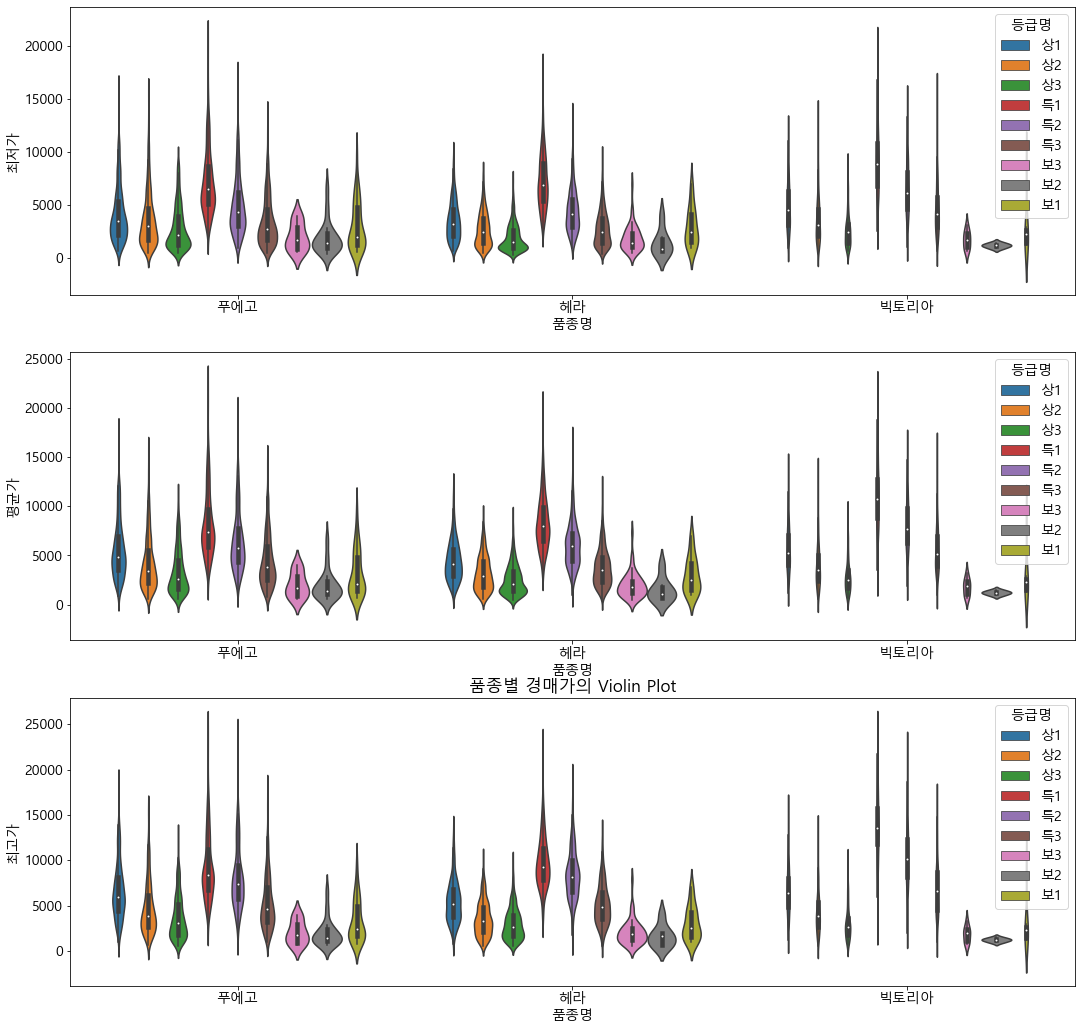

In [14]:
# 바이올린 플롯으로 이상치 확인
plt.figure(figsize=(18,18))
plt.subplot(3,1,1)
sns.violinplot(x="품종명", y="최저가", hue="등급명", data=df)
plt.subplot(3,1,2)
sns.violinplot(x="품종명", y="평균가", hue="등급명", data=df)
plt.subplot(3,1,3)
sns.violinplot(x="품종명", y="최고가", hue="등급명", data=df)
plt.title("품종별 경매가의 Violin Plot")
plt.show()

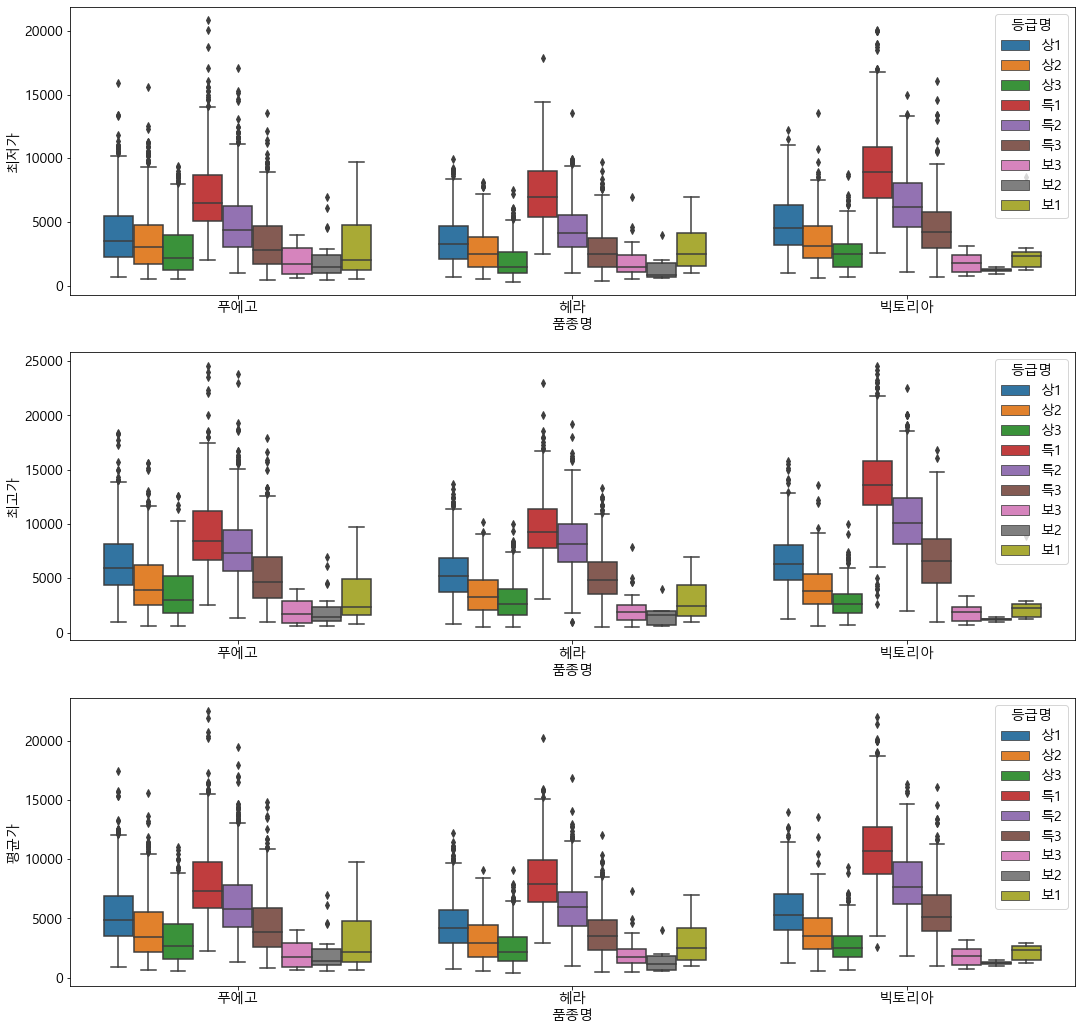

In [15]:
# 박스플롯으로 이상치 확인
plt.figure(figsize=(18,18))
plt.subplot(3,1,1)
sns.boxplot(x="품종명", y="최저가", hue="등급명", data=df)
plt.subplot(3,1,2)
sns.boxplot(x="품종명", y="최고가", hue="등급명", data=df)
plt.subplot(3,1,3)
sns.boxplot(x="품종명", y="평균가", hue="등급명", data=df)
plt.show()

In [16]:
# 변동계수(훝어진 정도 확인)
df_puego_avg = df.loc[df['품종명'] == '푸에고' , '평균가']
df_victoria_avg = df.loc[df['품종명'] == '빅토리아', '평균가']
df_hera_avg = df.loc[df['품종명'] == '헤라', '평균가']

In [17]:
def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

def var(inp):
    result = 0
    len_inp = len(inp)
    for i in inp:
        result += (i - mean(inp)) ** 2
    result = result / len_inp
    return result


def sqrt(inp):
    result = inp/2
    for i in range(30):
        result = (result + (inp / result)) / 2
    return result

def std(inp):
    result = sqrt(var(inp))
    return result


In [18]:
def cv(inp):
    result = std(inp) / mean(inp)
    return result

# 품종별 평균가 변동계수
cv_data1 = cv(df_puego_avg)
cv_data2 = cv(df_victoria_avg)
cv_data3 = cv(df_hera_avg)

print(cv_data1)
print(cv_data2)
print(cv_data3)

0.592047283687549
0.5113120871854863
0.5940284549414278


In [19]:
# 등급별 평균가 변동계수(cv) 확인
grade_avg = df.groupby(['등급명'])['평균가'].mean()
greade_std = df.groupby(['등급명'])['평균가'].std()
greade_std/grade_avg

등급명
보1    0.698561
보2    0.765859
보3    0.613658
상1    0.478912
상2    0.602043
상3    0.651364
특1    0.358478
특2    0.401731
특3    0.530578
Name: 평균가, dtype: float64

## 2. 데이터 탐색(EDA)

### 1) 상관관계, heatmap 출력

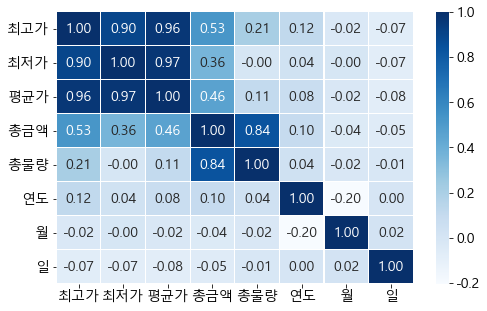

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.1, cmap='Blues')
plt.show()

### 2) 품종별 등급별 빈도

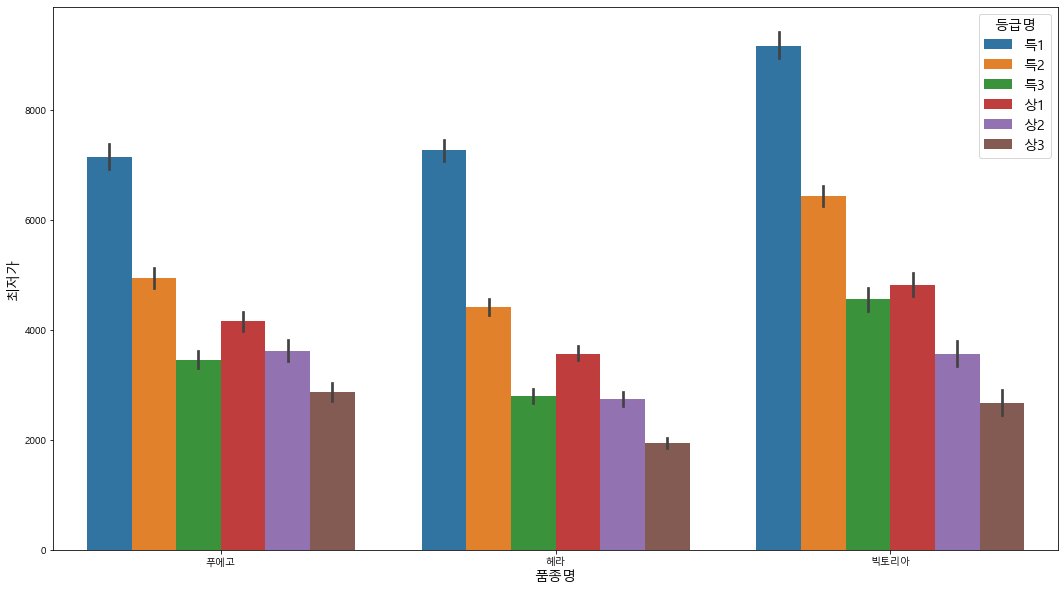

In [21]:
plt.figure(figsize=(18,10))
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
sns.barplot(data=df, x='품종명', y='최저가', hue='등급명', hue_order=['특1','특2','특3', '상1','상2','상3'])
plt.show()

In [22]:
df_a = df.groupby(['품종명', '등급명'])['최저가','평균가','최고가'].mean()
df_a

최저가           평균가           최고가
품종명  등급명                                         
빅토리아 보1   2891.428571   2914.714286   2944.285714
     보2   1220.000000   1220.000000   1220.000000
     보3   1775.000000   1805.500000   1837.500000
     상1   4823.083164   5654.563895   6569.290061
     상2   3569.720280   3876.094406   4176.538462
     상3   2675.086705   2861.271676   3003.410405
     특1   9164.246154  11027.303077  13882.046154
     특2   6432.240602   8067.565414  10472.766917
     특3   4563.526786   5587.107143   6803.950893
푸에고  보1   3049.767442   3187.860465   3314.651163
     보2   1971.818182   1988.606061   2010.909091
     보3   2015.454545   2028.272727   2040.000000
     상1   4156.406053   5530.849937   6614.552333
     상2   3625.829384   4162.949447   4712.180095
     상3   2875.919440   3322.155867   3696.900175
     특1   7143.894040   8145.917881   9154.993377
     특2   4939.600998   6392.120948   7958.054863
     특3   3463.324742   4441.648196   5291.082474
헤라   보1   2991.052632   3020.789474   3066.315789
     보2   1485.714286   1524.285714   1640.000000
     보3   1926.200000   2000.440000   2055.400000
     상1   3573.704735   4481.484680   5475.543175
     상2   2749.163636   3190.745455   3587.563636
     상3   1938.764706   2513.885294   2991.764706
     특1   7270.063091   8324.279180   9770.063091
     특2   4426.850282   6074.798023   8421.271186
     특3   2805.263889   3811.598611   5182.500000

<Figure size 1440x360 with 0 Axes>

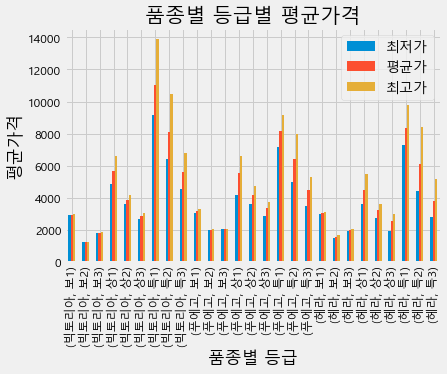

In [24]:
matplotlib.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
plt.rc('xtick', labelsize=12)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=12)  # y축 눈금 폰트 크기
df_a.plot(kind='bar')
plt.title("품종별 등급별 평균가격")
plt.xlabel("품종별 등급")
plt.ylabel("평균가격")
plt.show()

### 3) 품종별 경매가 추이

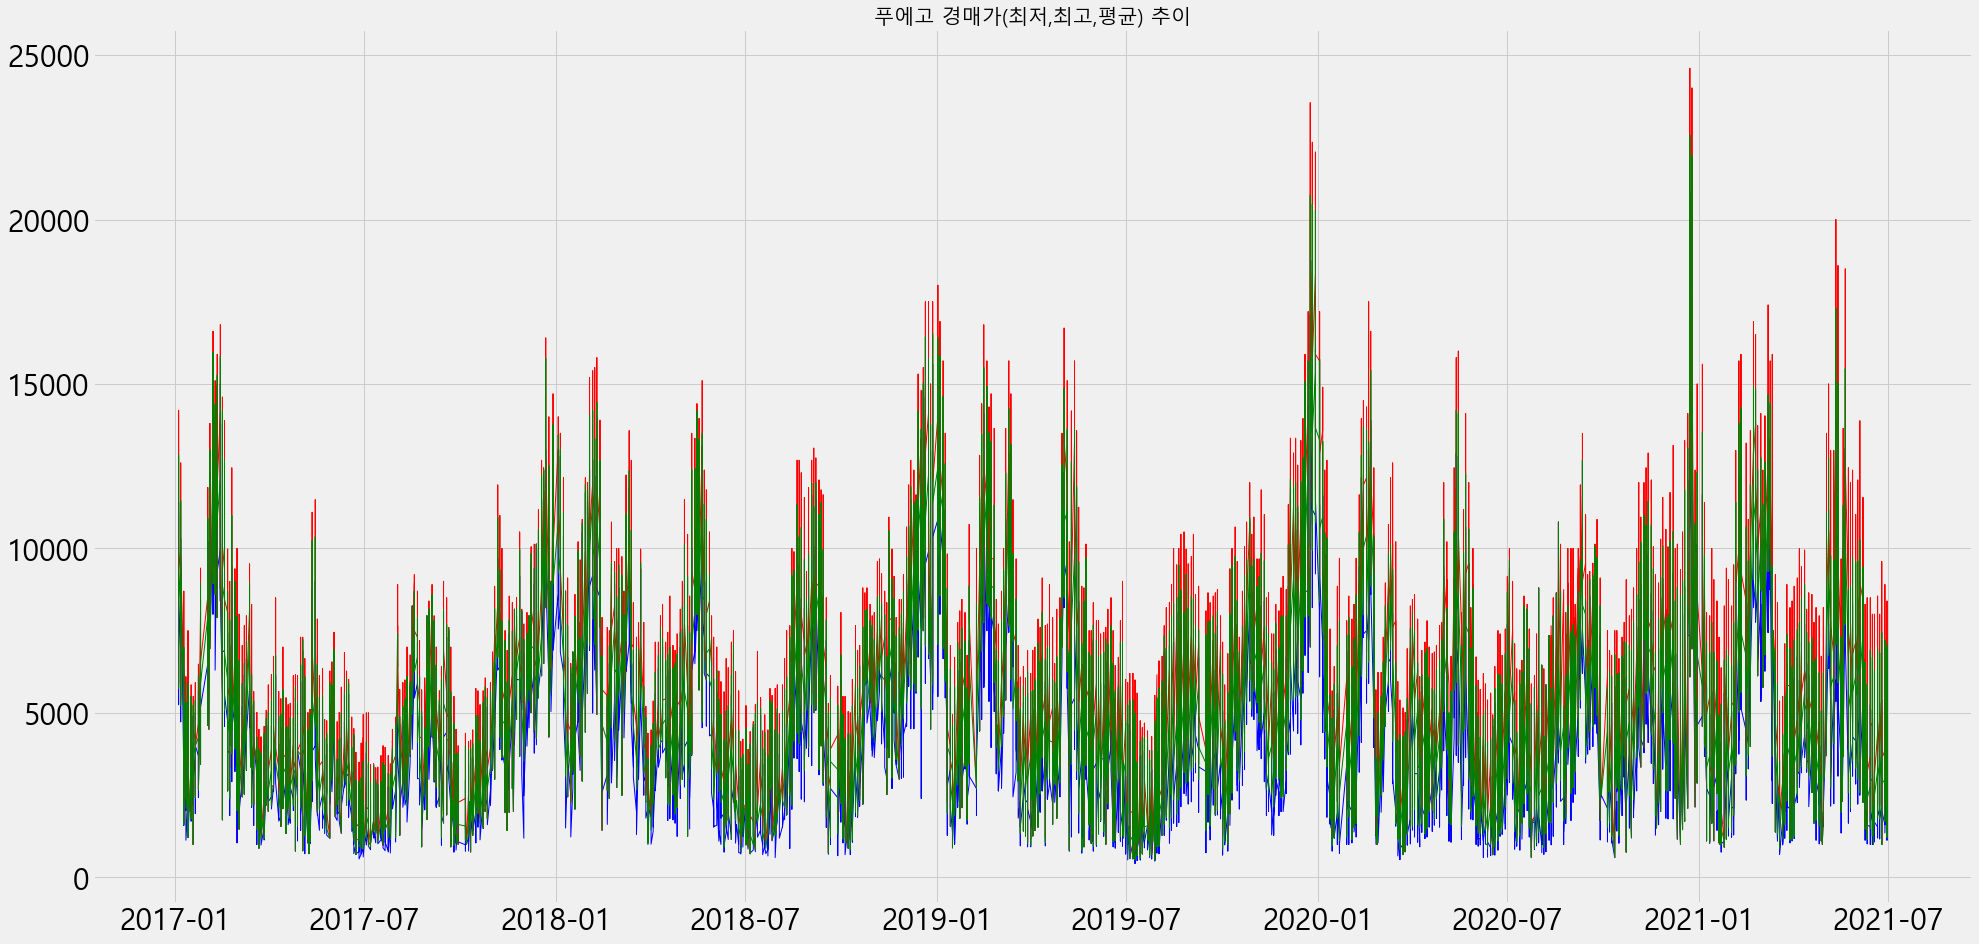

In [25]:
# 푸에고
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_puego['경매일'], df_puego['최저가'], 'b', linewidth = 1)
plt.plot(df_puego['경매일'], df_puego['최고가'], 'r', linewidth = 1)
plt.plot(df_puego['경매일'], df_puego['평균가'], 'g', linewidth = 1)
plt.title("푸에고 경매가(최저,최고,평균) 추이")
plt.show()

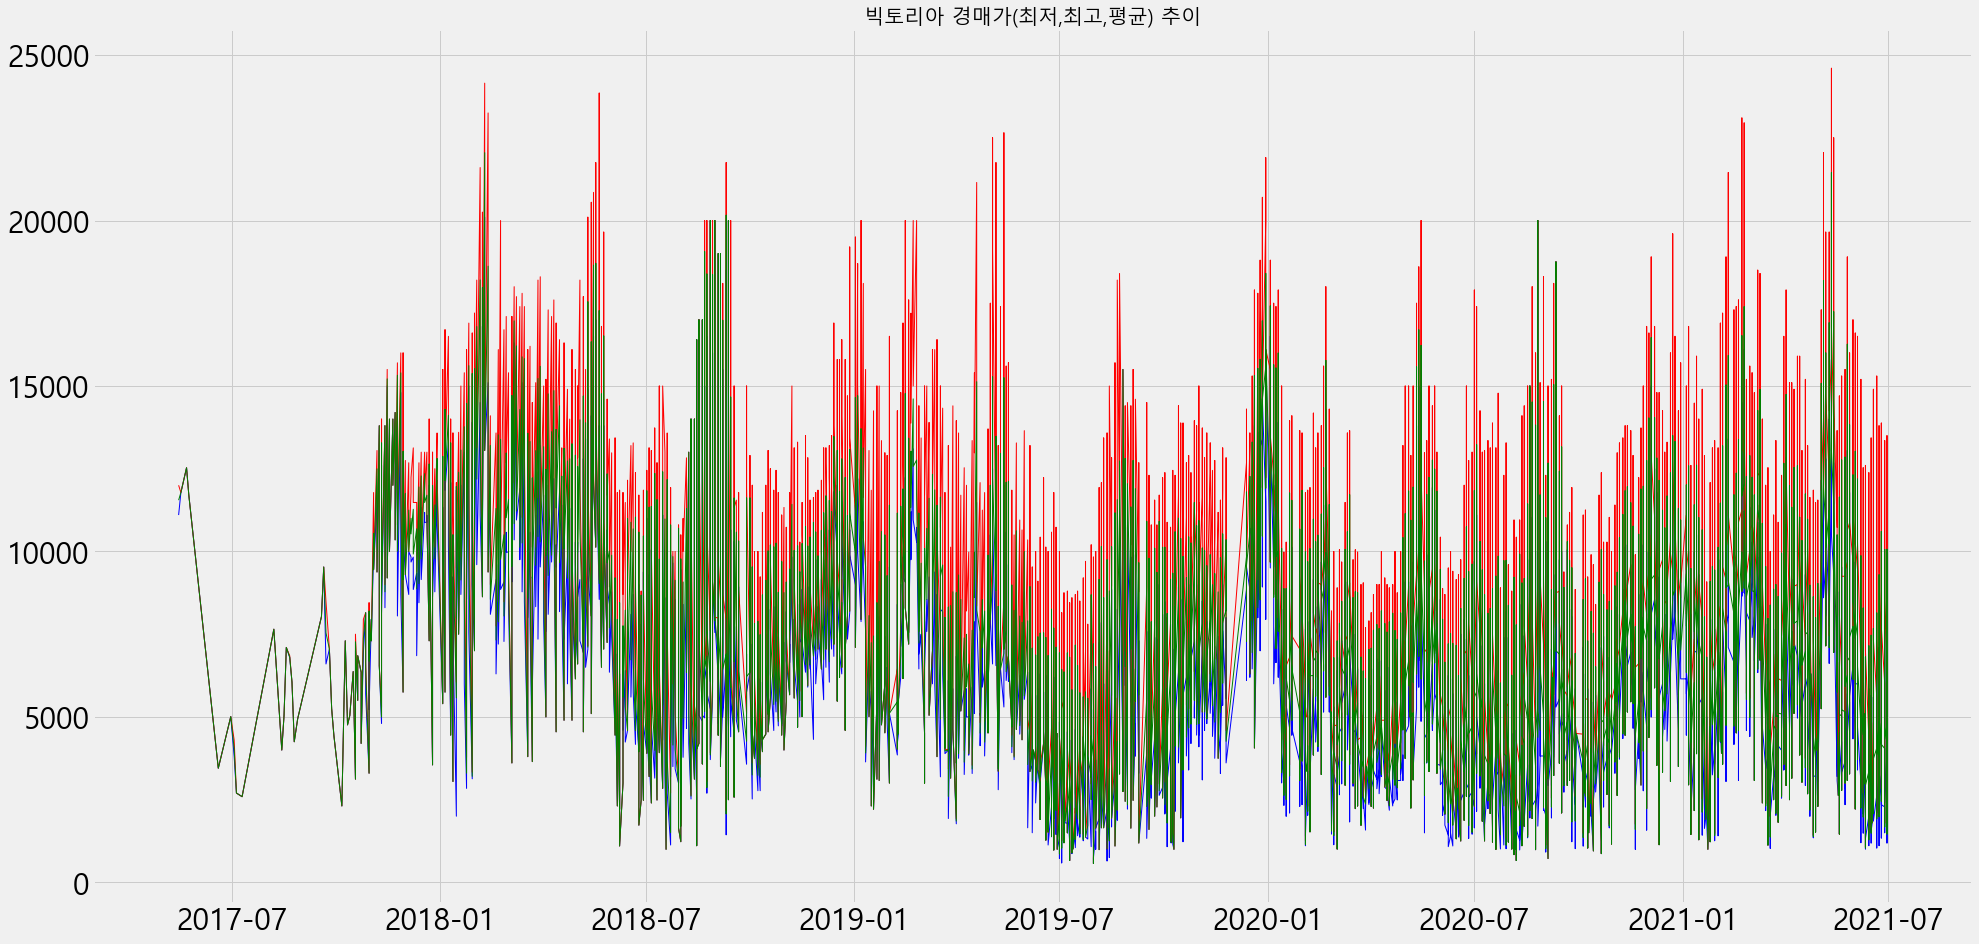

In [26]:
# 빅토리아
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_victoria['경매일'], df_victoria['최저가'], 'b', linewidth = 1)
plt.plot(df_victoria['경매일'], df_victoria['최고가'], 'r', linewidth = 1)
plt.plot(df_victoria['경매일'], df_victoria['평균가'], 'g', linewidth = 1)
plt.title("빅토리아 경매가(최저,최고,평균) 추이")
plt.show()

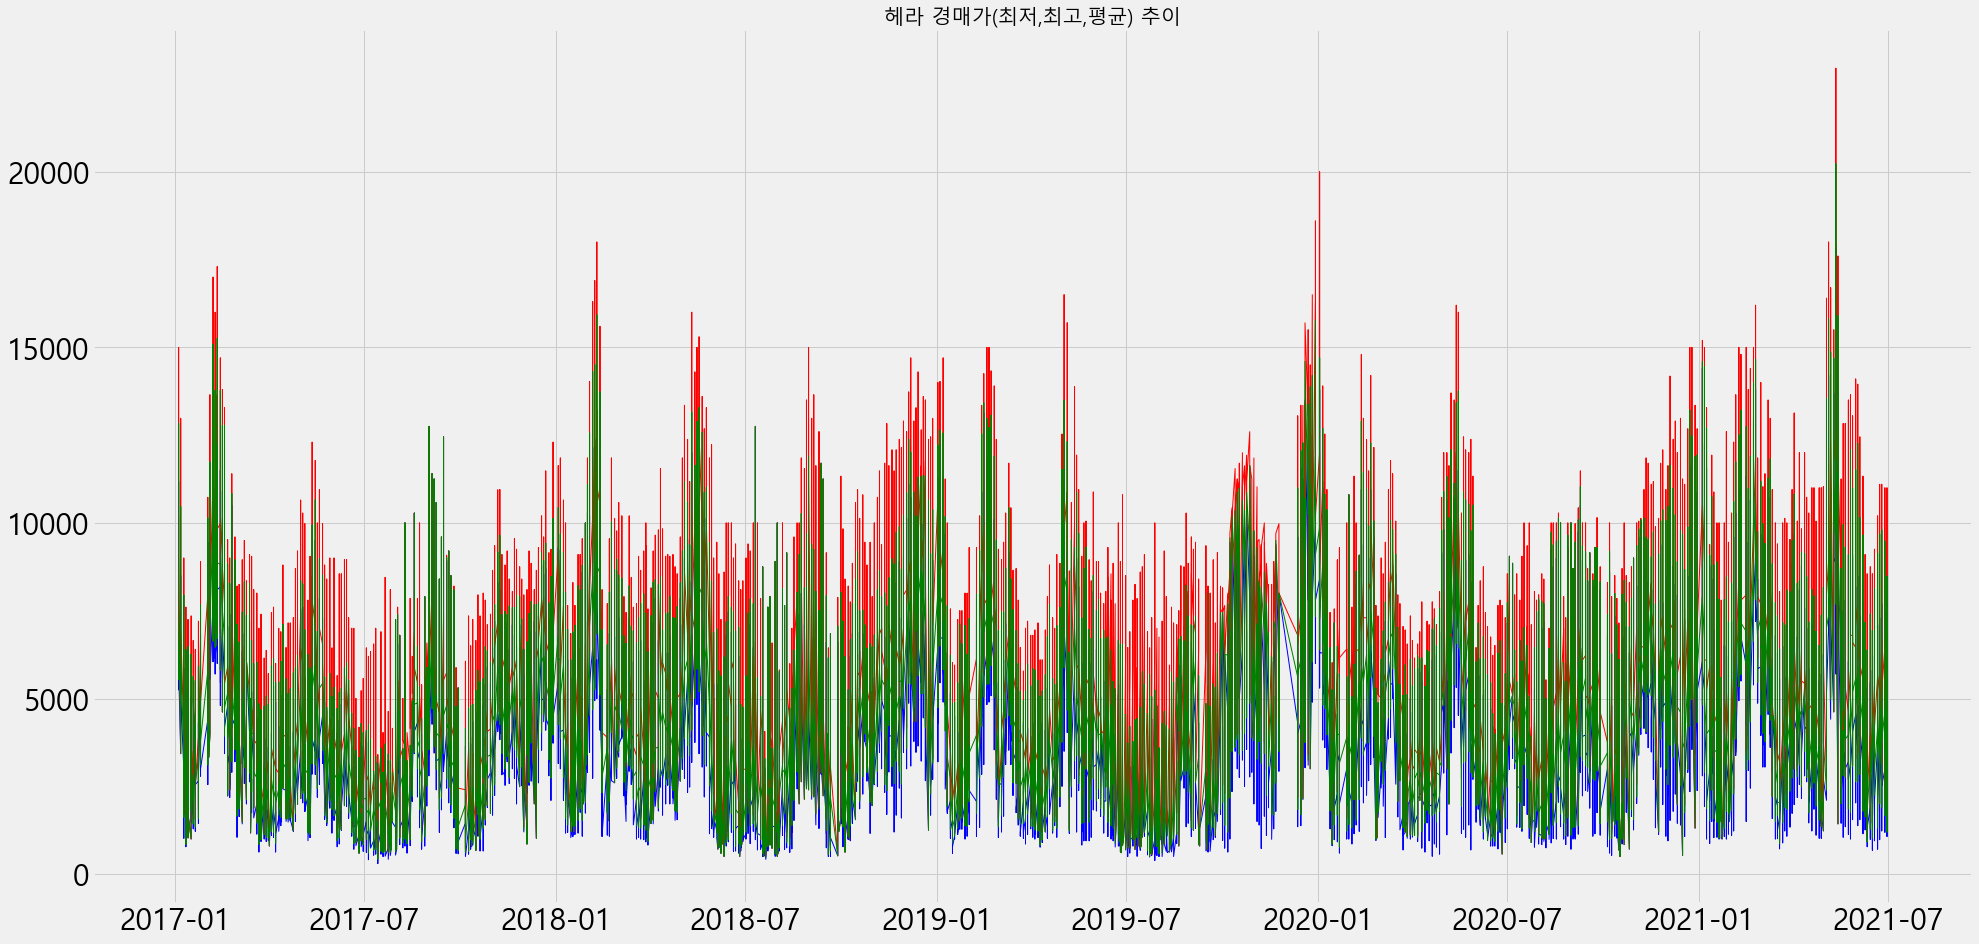

In [27]:
# 헤라
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_hera['경매일'], df_hera['최저가'], 'b', linewidth = 1)
plt.plot(df_hera['경매일'], df_hera['최고가'], 'r', linewidth = 1)
plt.plot(df_hera['경매일'], df_hera['평균가'], 'g', linewidth = 1)
plt.title("헤라 경매가(최저,최고,평균) 추이")
plt.show()

### 4) 품종별 경매가(평균가) 비교 추이

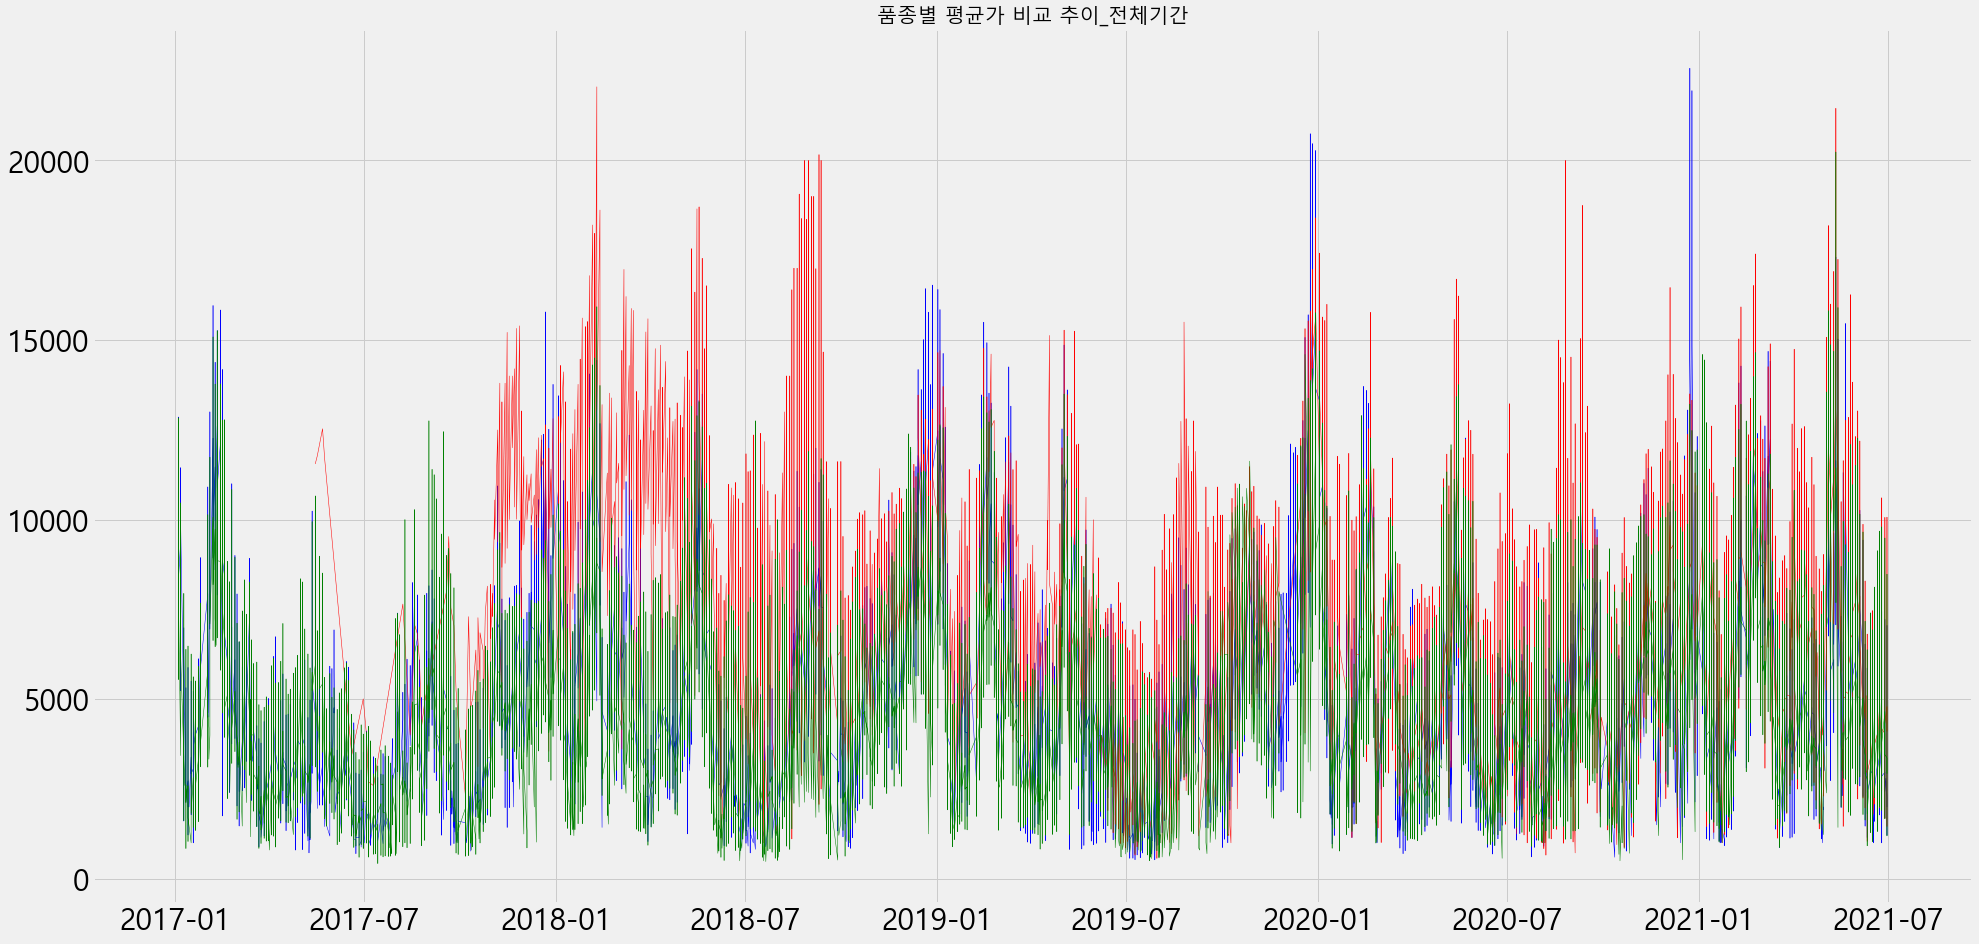

In [30]:
#평균가
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_puego['경매일'], df_puego['평균가'], 'b', linewidth = 0.5)
plt.plot(df_victoria['경매일'], df_victoria['평균가'], 'r', linewidth = 0.5)
plt.plot(df_hera['경매일'], df_hera['평균가'], 'g', linewidth = 0.5)
plt.title("품종별 평균가 비교 추이_전체기간")
plt.show()

In [29]:
df_puego_2019 = df_puego.query('연도 >= 2020')
df_vic_2019 = df_victoria.query('연도 >= 2020')
df_hera_2019 = df_hera.query('연도 >= 2020')

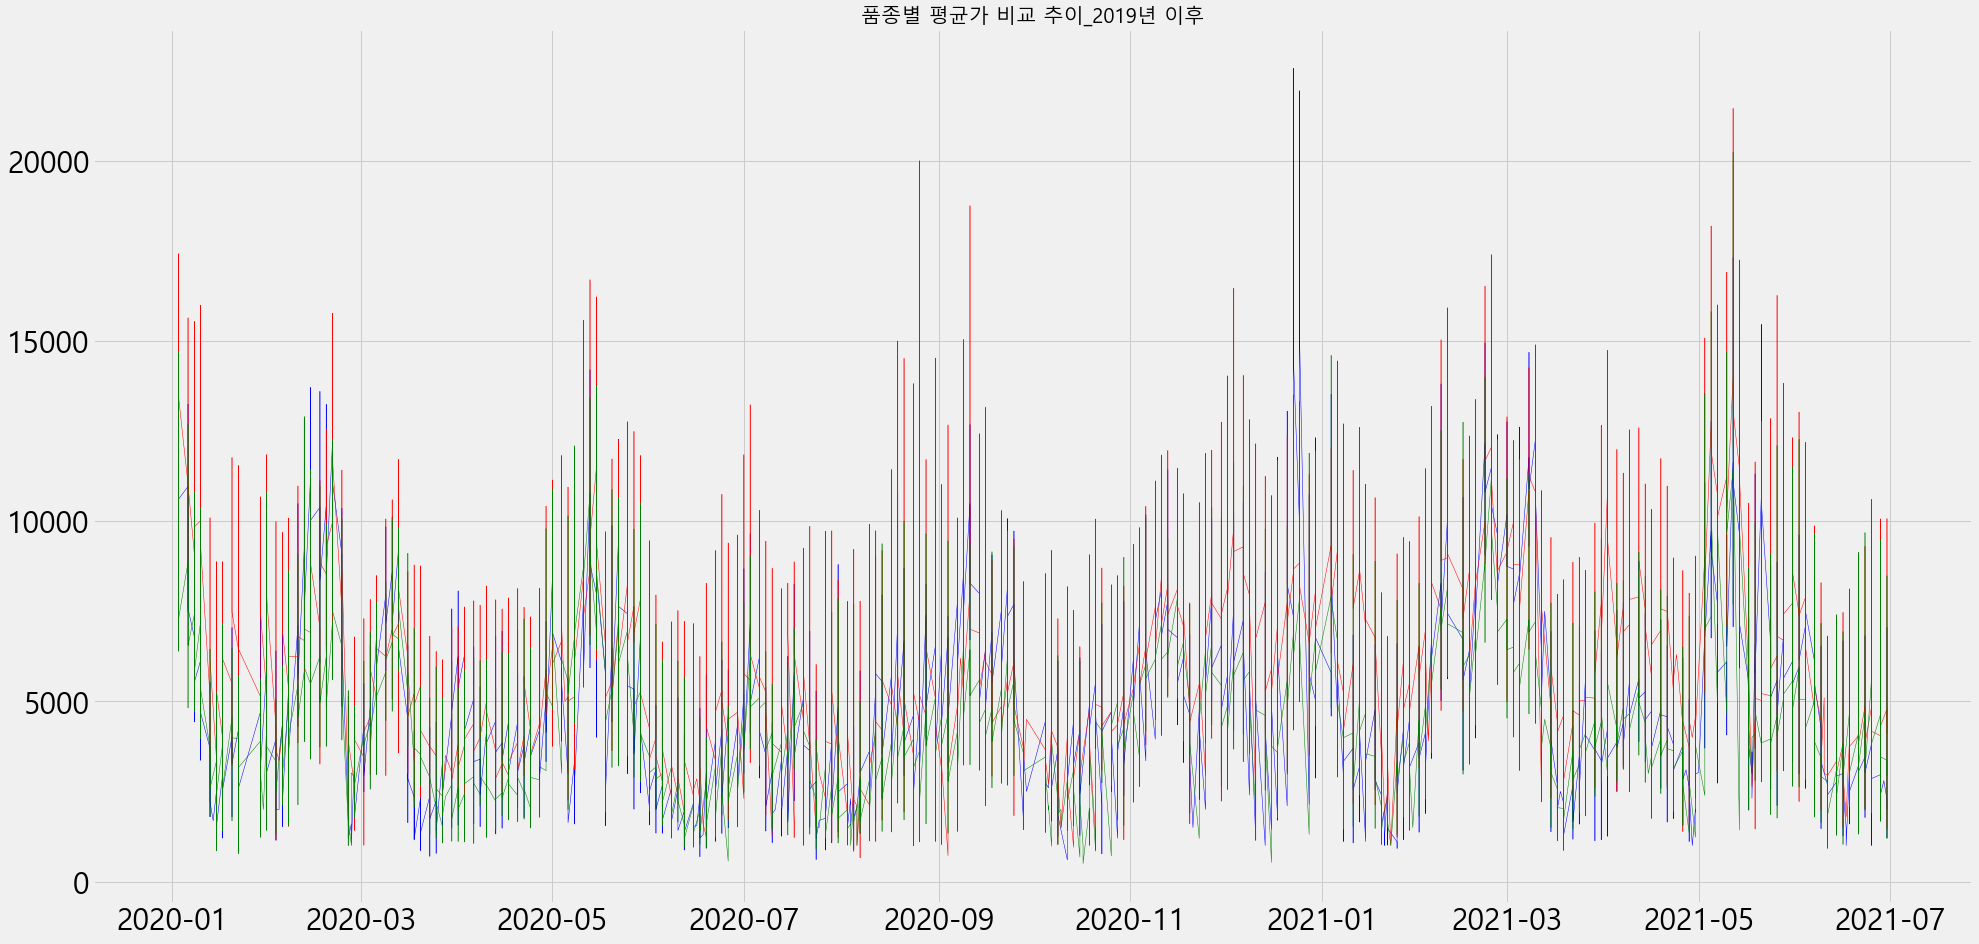

In [29]:
#평균가
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_puego_2019['경매일'], df_puego_2019['평균가'], 'b', linewidth = 0.5)
plt.plot(df_vic_2019['경매일'], df_vic_2019['평균가'], 'r', linewidth = 0.5)
plt.plot(df_hera_2019['경매일'], df_hera_2019['평균가'], 'g', linewidth = 0.5)
plt.title("품종별 평균가 비교 추이_2019년 이후")
plt.show()

### 5) 품종별 총물량 추이

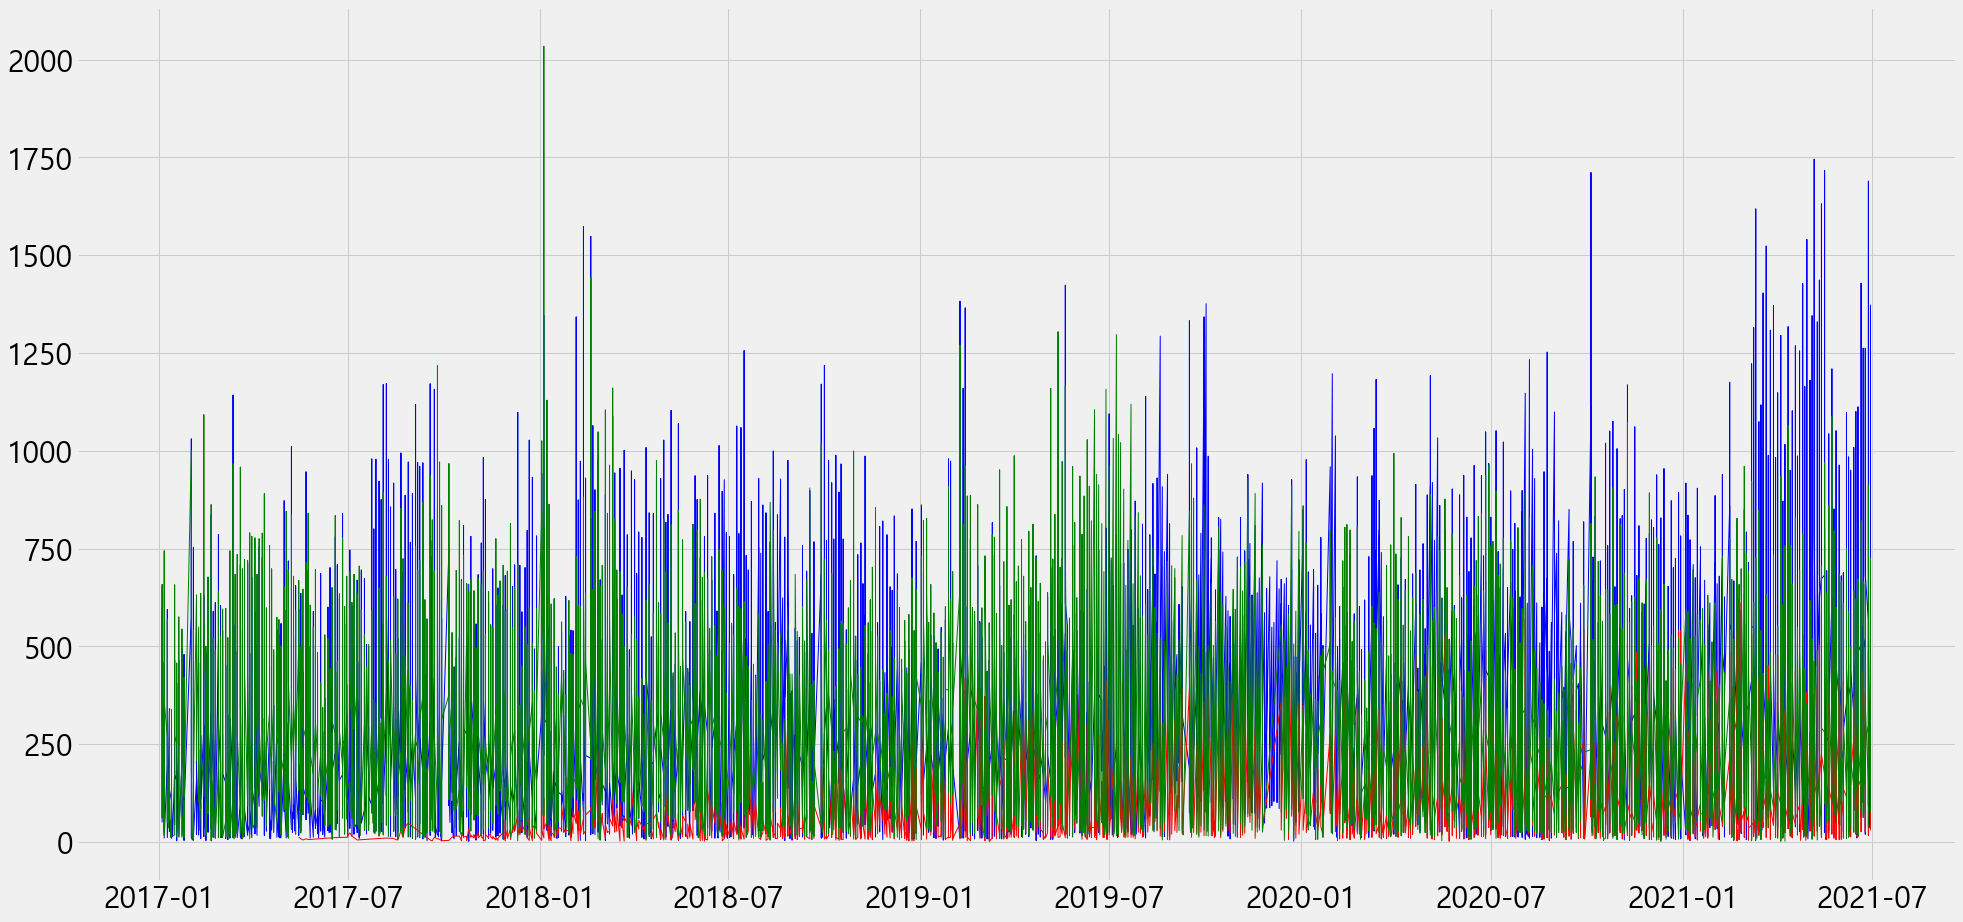

In [30]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
plt.plot(df_puego['경매일'], df_puego['총물량'], 'b', linewidth = 1)
plt.plot(df_victoria['경매일'], df_victoria['총물량'], 'r', linewidth = 1)
plt.plot(df_hera['경매일'], df_hera['총물량'], 'g', linewidth = 1)
plt.show()

### 6) 품종별 평균가 및 총물량 추이

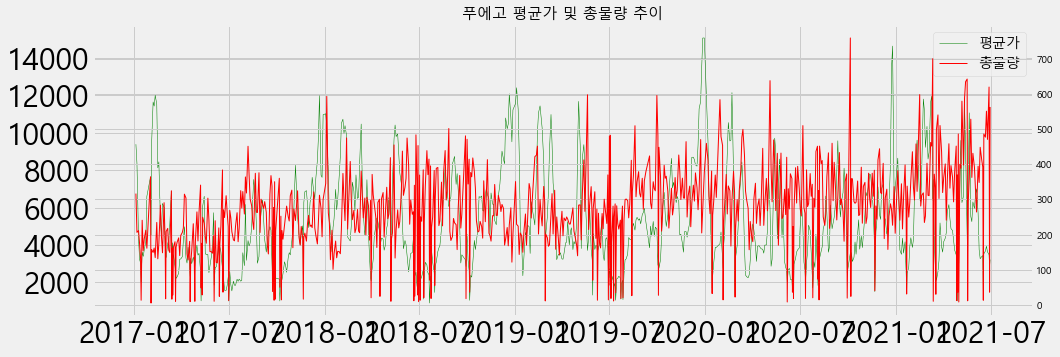

In [31]:
plt.figure(figsize=(15,5))
plt.title("푸에고 평균가 및 총물량 추이", fontsize=15)
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
a = df_puego.groupby('경매일')['평균가'].mean()
b = df_puego.groupby('경매일')['총물량'].mean()
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(a, color='green', label="평균가", linewidth = 0.5)
b, = ax2.plot(b, color='red', label="총물량", linewidth = 1)
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

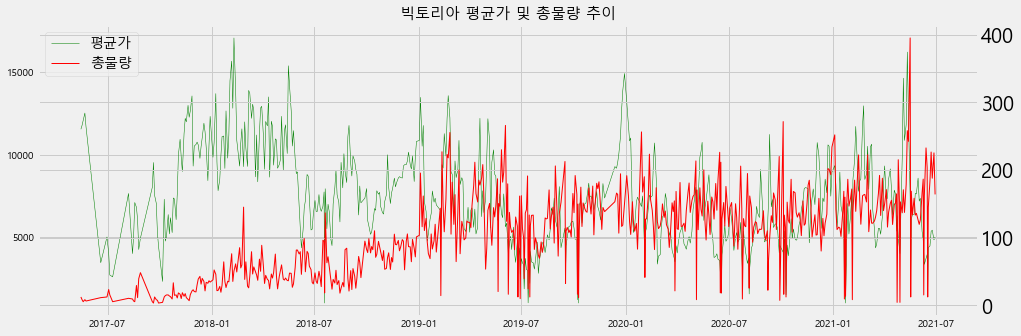

In [32]:
plt.figure(figsize=(15,5))
plt.title("빅토리아 평균가 및 총물량 추이", fontsize=15)
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
a = df_victoria.groupby('경매일')['평균가'].mean()
b = df_victoria.groupby('경매일')['총물량'].mean()
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(a, color='green', label="평균가", linewidth = 0.5)
b, = ax2.plot(b, color='red', label="총물량", linewidth = 1)
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

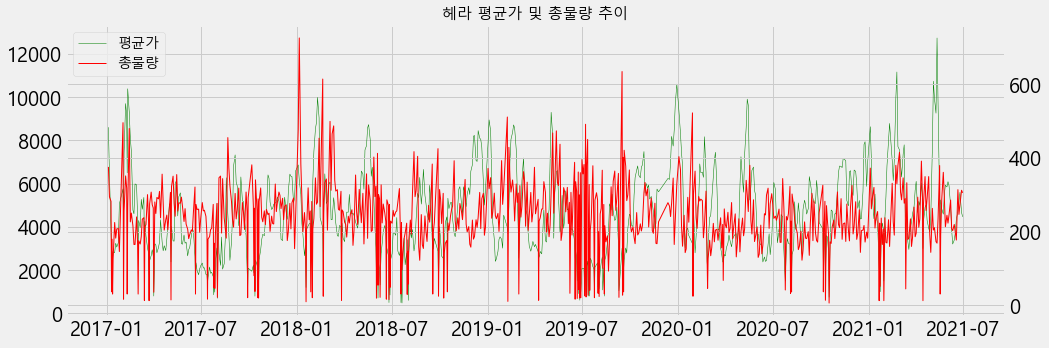

In [33]:
plt.figure(figsize=(15,5))
plt.title("헤라 평균가 및 총물량 추이", fontsize=15)

a = df_hera.groupby('경매일')['평균가'].mean()
b = df_hera.groupby('경매일')['총물량'].mean()
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(a, color='green', label="평균가", linewidth = 0.5)
b, = ax2.plot(b, color='red', label="총물량", linewidth = 1)
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

### 7) feature engineering
- 비수기여부 : 6,7,8월 비수기
- 월,수,금 : 경매일 요일에 따른 영향이 있을 수 있다.

In [34]:
df.head(1)

,경매일,화훼부류명,품목명,품종명,등급명,최고가,최저가,평균가,총금액,총물량,연도,월,일
0,2017-01-04,절화,장미,푸에고,상1,11030,8400,10036,6553660,653,2017,1,4


#### - 요일 Featrue 추가

In [35]:
df['요일'] = [df['경매일'][x].day_name() for x in range(0, len(df))]

In [36]:
df['요일'].value_counts()

Monday       3732
Friday       3637
Wednesday    3637
Tuesday        85
Saturday       75
Thursday       71
Name: 요일, dtype: int64

In [37]:
pd.DataFrame(df.groupby(['요일', '품종명'])['평균가'].mean())

평균가
요일        품종명              
Friday    빅토리아  7231.953984
          푸에고   5633.362177
          헤라    4827.573496
Monday    빅토리아  7056.267666
          푸에고   5436.111724
          헤라    4692.201780
Saturday  빅토리아  3322.875000
          푸에고   2419.250000
          헤라    1691.806452
Thursday  빅토리아  2400.000000
          푸에고   2236.500000
          헤라    1855.125000
Tuesday   빅토리아  3756.461538
          푸에고   2218.351351
          헤라    1873.028571
Wednesday 빅토리아  7254.392405
          푸에고   5342.840389
          헤라    4771.656368

In [38]:
df_col = df.columns

In [39]:
deal_date = (df.요일 == 'Monday') | (df.요일 == 'Wednesday') | (df.요일 == 'Friday')
df = df.loc[deal_date, df_col] # 필터링 된 row의 특정 컬럼만 추출

#### - 비수기여부 feature 추가

In [40]:
df['비수기여부'] = (df.월 == 6) | (df.월 == 7) | (df.월 == 8)

In [41]:
df.loc[df['비수기여부'] == False, '비수기여부'] = 0
df.loc[df['비수기여부'] == True, '비수기여부'] = 1

In [42]:
df.head(1)

,경매일,화훼부류명,품목명,품종명,등급명,최고가,최저가,평균가,총금액,총물량,연도,월,일,요일,비수기여부
0,2017-01-04,절화,장미,푸에고,상1,11030,8400,10036,6553660,653,2017,1,4,Wednesday,0


In [43]:
df_final = df.query('연도 >= 2018')

In [44]:
df_final['요일'].value_counts()

Monday       3132
Wednesday    3025
Friday       3024
Name: 요일, dtype: int64

In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9181 entries, 1876 to 11236
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   경매일     9181 non-null   datetime64[ns]
 1   화훼부류명   9181 non-null   object        
 2   품목명     9181 non-null   object        
 3   품종명     9181 non-null   object        
 4   등급명     9181 non-null   object        
 5   최고가     9181 non-null   int64         
 6   최저가     9181 non-null   int64         
 7   평균가     9181 non-null   int64         
 8   총금액     9181 non-null   int64         
 9   총물량     9181 non-null   int64         
 10  연도      9181 non-null   int64         
 11  월       9181 non-null   int64         
 12  일       9181 non-null   int64         
 13  요일      9181 non-null   object        
 14  비수기여부   9181 non-null   object        
dtypes: datetime64[ns](1), int64(8), object(6)
memory usage: 1.1+ MB


#### -최종 데이터 저장

In [47]:
df_final.to_csv('data/df_final.csv', index=False, encoding='utf-8-sig')